In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.6.0


## 1. Download the flowers dataset (a dataset of several thousands photos of flowers)

In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 13s 0us/step


In [9]:
list(data_dir.glob('*/*.jpg'))[0]

PosixPath('/mnt/Storage/home/yuzhaowei/.keras/datasets/flower_photos/sunflowers/5027895361_ace3b731e5_n.jpg')

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [10]:
roses = list(data_dir.glob('roses/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))

## 2. Load single image with PIL (python image library)

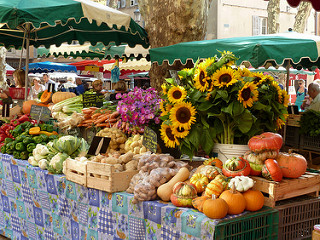

In [27]:
# open images with PIL
PIL.Image.open(str(sunflowers[0]))

In [28]:
# convert image to matrix
rose = PIL.Image.open(str(roses[0]))
np.array(rose).shape

(313, 500, 3)

## 3. Load single image with matplotlib

(240, 320, 3)


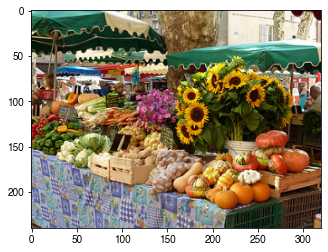

In [30]:
from matplotlib.image import imread

# load image to matrix with matplotlib
image = imread(sunflowers[0])
print(image.shape)

plt.imshow(image) # show the image from matrix

## 4. Resize image with TensorFlow

>When training vision models, it is common to resize images to a lower dimension ((224 x 224), (299 x 299), etc.) to allow mini-batch learning and also to keep up the compute limitations. We generally make use of image resizing methods like <b>bilinear interpolation</b> for this step and the resized images do not lose much of their perceptual character to the human eyes. In [Learning to Resize Images for Computer Vision Tasks](https://arxiv.org/abs/2103.09950v1), Talebi et al. show that if we try to optimize the perceptual quality of the images for the vision models rather than the human eyes, their performance can further be improved.

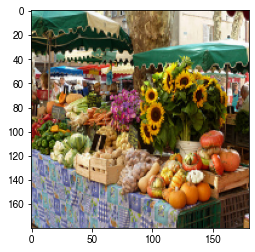

In [49]:
image_resize = tf.image.resize(image, (180, 180), method = "bilinear")
plt.imshow(image_resize.numpy().astype("uint8"))

## 5. Load multiple images from directory with tf.keras.preprocessing

In [31]:
# define some parameters for the loader

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2, # use 80% of images for training and 20% for validation
  subset = "training",    # one of "training" or "validation", only used if validation_split is set.
  seed = 123,
  image_size = (img_height, img_width), # 
  batch_size = batch_size) # size of the batches of data

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2, # use 80% of images for training and 20% for validation
  subset = "validation",    # one of "training" or "validation", only used if validation_split is set.
  seed = 123,
  image_size = (img_height, img_width),
  batch_size = batch_size) # size of the batches of data

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [32]:
# find the class names in the class_names attribute on these datasets.

class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


tf.Tensor([0 1 2 1 0 3 3 1 1 0 3 3 1 1 3 2 4 4 0 1 4 4 2 2 2 1 0 0 2 1 1 1], shape=(32,), dtype=int32)


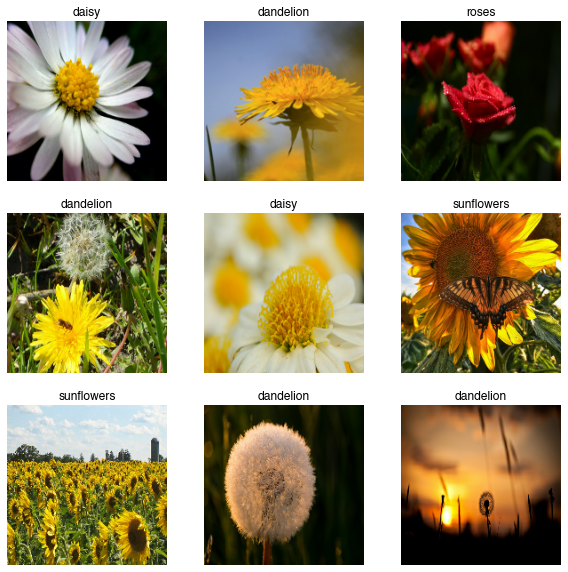

In [37]:
# visualize the data

plt.figure(figsize=(10, 10))
count = 0
for images, labels in train_ds.take(1): # get one training batch
    print(labels)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [41]:
# load all traning batches with batch size = 32
for image_batch, labels_batch in train_ds:
    print(image_batch.shape) # a tensor of the shape (32, 180, 180, 3) 
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [ ]:
# standardize the data (The RGB channel values are in the [0, 255] range. This is not ideal for a neural network


